In [2]:
!pip install pandas
#We install pandas for our dataframe in

In [3]:
!pip install chembl_webresource_client
# This part we install the database we will be using which will be chembl 

In [4]:
from chembl_webresource_client.new_client import new_client
#importing new_client from the chembl database

In [5]:
import pandas as pd 
#Importing pandas as pd again 

In [6]:
#target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [7]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL3927'

In [8]:
#this is used to retreive bioactivity data for coronavirus 
#3C-like proteniase (chembl3927 that are reported as IC50 value
activity = new_client.activity 
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [9]:
df= pd.DataFrame.from_dict(res)

In [10]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [11]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [12]:
# the standard value in the above output shows the potency of the drug. The lower the number, the better the potency. The higher, the worse. 

In [13]:
#create a csv called bioactivity_data 
df.to_csv('bioactivity_data.csv', index = False)

In [14]:
#if any compounds has a missing value for the standard_value column then drop it
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [15]:
bioactivity_class = []
for i in df2.standard_value:
    if float (i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

In [16]:
df2.molecule_chembl_id

0       CHEMBL187579
1       CHEMBL188487
2       CHEMBL185698
3       CHEMBL426082
4       CHEMBL187717
           ...      
128    CHEMBL2146517
129     CHEMBL187460
130     CHEMBL363535
131     CHEMBL227075
132      CHEMBL45830
Name: molecule_chembl_id, Length: 133, dtype: object

In [17]:
# we will now iterate to prevent redundancy on 
mol_cid =[] # create this variable 
for i in df2.molecule_chembl_id:
    mol_cid.append(i)

In [18]:
mol_cid

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717',
 'CHEMBL365134',
 'CHEMBL187598',
 'CHEMBL190743',
 'CHEMBL365469',
 'CHEMBL188983',
 'CHEMBL191575',
 'CHEMBL370923',
 'CHEMBL194398',
 'CHEMBL196635',
 'CHEMBL209287',
 'CHEMBL358279',
 'CHEMBL348660',
 'CHEMBL379727',
 'CHEMBL210525',
 'CHEMBL148483',
 'CHEMBL383725',
 'CHEMBL118596',
 'CHEMBL208732',
 'CHEMBL208732',
 'CHEMBL210146',
 'CHEMBL210146',
 'CHEMBL207458',
 'CHEMBL207458',
 'CHEMBL207484',
 'CHEMBL207484',
 'CHEMBL207207',
 'CHEMBL207207',
 'CHEMBL210487',
 'CHEMBL210487',
 'CHEMBL380470',
 'CHEMBL380470',
 'CHEMBL210612',
 'CHEMBL210612',
 'CHEMBL209667',
 'CHEMBL209667',
 'CHEMBL210097',
 'CHEMBL210097',
 'CHEMBL378674',
 'CHEMBL378674',
 'CHEMBL210216',
 'CHEMBL210216',
 'CHEMBL210195',
 'CHEMBL210195',
 'CHEMBL210437',
 'CHEMBL210437',
 'CHEMBL378677',
 'CHEMBL378677',
 'CHEMBL210972',
 'CHEMBL210972',
 'CHEMBL210145',
 'CHEMBL210145',
 'CHEMBL377225',
 'CHEMBL377225',
 'CHEMBL210823

In [19]:
canonical_smiles = []
for i in df2.canonical_smiles:
    canonical_smiles.append(i)
#This ended up being the more complicated way of doing things

In [20]:
standard_value = []
for i in df2.standard_value:
    standard_value.append(i)

In [21]:
# This is the alternate eay of getting what we wanted 
selection = ['molecule_chembl_id', 'canonical_smiles',
             'standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [22]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame(data_tuples, columns= ['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [23]:
pd.concat([df3,pd.Series(bioactivity_class)],axis=1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,0
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,intermediate
...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,inactive


In [24]:
df3.to_csv('bioactivity_preprocessed_data.csv', index = False)

In [25]:
ls -l


total 114728
-rw-r--r--  1 josephlenzo  staff    325720 Feb  8 14:58 Bioinformatic for drug discovery .ipynb
-rw-r--r--  1 josephlenzo  staff    180388 Nov  2 12:14 Carmax Data Analytics.ipynb
-rw-r--r--  1 josephlenzo  staff     17025 Dec  1 15:27 HD_Scott.ipynb
-rw-r--r--  1 josephlenzo  staff  15686583 Oct 19 13:17 ShowcaseDataFall21.csv
-rw-r--r--  1 josephlenzo  staff  14577574 Oct 22 14:53 ShowcaseDataFall21fin.csv
drwxr-xr-x  2 josephlenzo  staff        64 Oct 19 13:18 Untitled Folder/
-rw-r--r--  1 josephlenzo  staff      4991 Nov 29 11:55 Untitled.ipynb
-rw-r--r--  1 josephlenzo  staff    655414 Feb  1 11:16 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r--  1 josephlenzo  staff   8363459 Feb  1 12:47 acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r--  1 josephlenzo  staff     70334 Feb  8 15:01 bioactivity_data.csv
-rw-r--r--  1 josephlenzo  staff     10578 Feb  8 15:01 bioactivity_preprocessed_data.csv
-rw-r--r--  1 josephlenz

In [26]:
ls -l

total 114728
-rw-r--r--  1 josephlenzo  staff    325720 Feb  8 14:58 Bioinformatic for drug discovery .ipynb
-rw-r--r--  1 josephlenzo  staff    180388 Nov  2 12:14 Carmax Data Analytics.ipynb
-rw-r--r--  1 josephlenzo  staff     17025 Dec  1 15:27 HD_Scott.ipynb
-rw-r--r--  1 josephlenzo  staff  15686583 Oct 19 13:17 ShowcaseDataFall21.csv
-rw-r--r--  1 josephlenzo  staff  14577574 Oct 22 14:53 ShowcaseDataFall21fin.csv
drwxr-xr-x  2 josephlenzo  staff        64 Oct 19 13:18 Untitled Folder/
-rw-r--r--  1 josephlenzo  staff      4991 Nov 29 11:55 Untitled.ipynb
-rw-r--r--  1 josephlenzo  staff    655414 Feb  1 11:16 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r--  1 josephlenzo  staff   8363459 Feb  1 12:47 acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r--  1 josephlenzo  staff     70334 Feb  8 15:01 bioactivity_data.csv
-rw-r--r--  1 josephlenzo  staff     10578 Feb  8 15:01 bioactivity_preprocessed_data.csv
-rw-r--r--  1 josephlenz

In [27]:
#End of part 1 Data collection 
#Beginning of Part 2 Data extraction 

In [28]:
#part two contains the IC50 and we will only choose 
#two bioactivity class which will be active and inactive
#rdkit will allow for dowload of molecular descriptors
# All done within the terminal 

In [29]:
import pandas as pd

In [32]:
#Loading up the CSV file code from the previcous code
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [33]:
# We use the lipinski descriptor which is a rule
#of thumb eavaluating drug likeness of compunds. 
# Lipinksi analyzes the active fda approved drugs using the rule of 5
# 1.)Molecular weight > 500 dalton 2.) Octanal-wter partation coeffient(LogP)>5 
#3.) Hydrogen bond donars <5 4.) Hydrogen bond acceptors < 10

import numpy as np 
#from rdkit import Chem 
from rdkit.chem import Descriptors, Lipinski 

ModuleNotFoundError: No module named 'rdkit.chem'

In [34]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


zsh:1: command not found: wget
Solving environment: done

## Package Plan ##

  environment location: /Users/josephlenzo/opt/anaconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py38hecd8cb5_2         152 KB
    conda-4.11.0               |   py38hecd8cb5_0        14.4 MB
    openssl-1.1.1m             |       hca72f7f_0         2.2 MB
    ------------------------------------------------------------
                                           Total:        16.8 MB

The following packages will be UPDATED:

  certifi                          2021.10.8-py38hecd8cb5_0 --> 2021.10.8-py38hecd8cb5_2
  conda                               4.10.3-py38hecd8cb5_0 --> 4.11.0-py38hecd8cb5_0
  openssl                                 1.1.1l-h9ed2024_0 --> 1.1.1m-hca72f7f_0



conda-4.11.0         | 14.4 MB   | ###################

In [35]:
from rdkit import Chem 

In [36]:
from rdkit.Chem import Descriptors, Lipinski 

In [37]:
# CALCULATING THE DESCRIPTORS#

def lipinski(smiles, verbose=False):
#The smiles notation contatins the chemical
#information which tells us the exact atomic details of the molecule 

    
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHdonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt,
                       desc_MolLogP,desc_NumHdonors ,
                       desc_NumHAcceptors])
        if(i == 0):
            baseData=row 
        else: 
            baseData=np.vstack([baseData,row ])
        i= i+1
        
    columnNames= ["MW","LogP","NumHdonors", "NumHAcceptors" ]
    descriptors = pd.DataFrame(data = baseData, columns = columnNames)
    
    return descriptors 

In [38]:
df_lipinski = lipinski(df.canonical_smiles)

In [39]:
df_lipinski 

,MW,LogP,NumHdonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [40]:
# MW descriptor tells us the size 
# LogP descriptor tells us solibility 

In [41]:
df 
#The dataframe from part one

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


In [42]:
# We will combine the 2 data frames 
df_combined = pd.concat([df,df_lipinski], axis=1)

In [43]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHdonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,278.307,3.29102,0.0,3.0


In [44]:
#CONVERT IC50 T0 pIC50
# this will allow data to be more uniformly distributed
# this will make the distribution more even 

import numpy as np

def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i*(10**-9)# converts nM to M|nanoMoler to Moler
        pIC50.append(-np.log10(molar))
        
    input ['pIC50']=pIC50
    x = input.drop('standard_value_norm', 1)
    
    return x

In [45]:
df_combined.standard_value.describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [46]:
-np.log10((10**-9)* 100000000)

1.0

In [47]:
-np.log10((10**-9)* 10000000000)

-1.0

In [48]:
def norm_value(input):
    norm = []
    
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
            
    input['standard_value_norm'] = norm 
    x = input.drop('standard_value', 1 )
    
    return x

In [49]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/pg/1jhff7l50jvfl0kr524r8h480000gn/T/ipykernel_2007/1627581750.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1 )


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHdonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,10700.0


In [50]:
df_combined.standard_value.describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [51]:
df_final = pIC50(df_norm)
df_final

/var/folders/pg/1jhff7l50jvfl0kr524r8h480000gn/T/ipykernel_2007/3924622887.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHdonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [52]:
 df_final.pIC50.describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

In [53]:
#Here we will be deleting the intermidate class from our data set 

df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

#Tried to do this but I think it was already removed 

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHdonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [54]:
import seaborn as sns
sns.set(style= 'ticks')
import matplotlib.pyplot as plt 

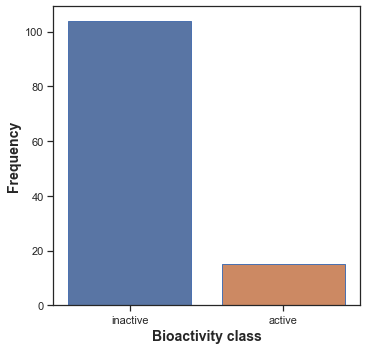

In [55]:
#Creating a frequency plot of the 2 bioactivity classes
#it will compare the inactive and active molecules 
plt.figure (figsize =  (5.5, 5.5))

sns.countplot(x = 'bioactivity_class', data= df_2class, edgecolor= 'b')

#x and y labels are obtained using these lines of code 
plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')

#uploaded into a pdf file allowuing use for report or publication 
plt.savefig('plot_bioactivity_class.pdf')

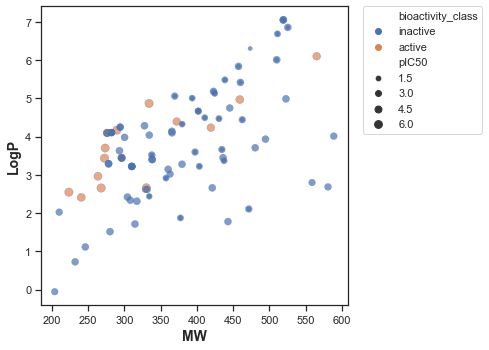

In [56]:
#Define the figure size 
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x = 'MW' , y= 'LogP', data=df_2class, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'b', alpha = 0.7)
 
plt.xlabel('MW',fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize= 14,fontweight = 'bold')
#The line below places the legend outside of the plot having it be easy to see 
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad= 0)
#save it to this pdf file 
plt.savefig('plot_MW_vs_LogP.pdf')


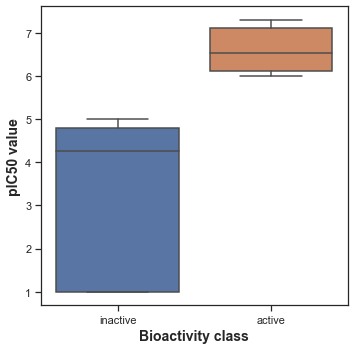

In [57]:
#pIC50 value box plot 

plt.figure(figsize=(5.5,5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize= 14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize = 14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [58]:
#Statistical analysis | Mann-Whittney U Test : s used to compare 
#whether there is a difference in the dependent variable 
#for two independent groups

def mannwhitney(descriptor, verbose = False):
    from numpy.random import seed
    from numpy.random import randn 
    from scipy.stats import mannwhitneyu

# seed the random number generator 
    seed(1)

#actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]

#compare samples

    stat, p = mannwhitneyu(active, inactive)

#interpret 
    alpha = 0.05
    if p > alpha:
        
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Descriptor': descriptor,
                       'Statistics': stat,
                       'p':p,
                       'alpha':alpha,
                       'Interpretation':interpretation},index =[0])
    filename = 'mannwhitneyu_'+ descriptor +'.csv'
    results.to_csv(filename)

    return results 

In [59]:
mannwhitney('pIC50')
#compares the active and inactive class to 
# see statistical diff

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1560.0,3.325272e-10,0.05,Different distribution (reject H0)


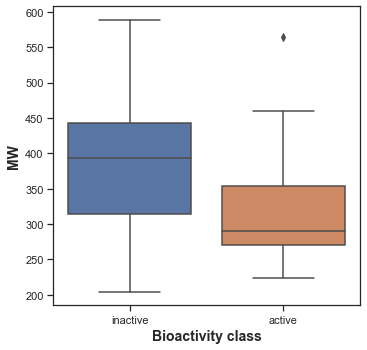

In [60]:
# mann Whitney test for the other descriptors#
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)          
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
            
plt.savefig('plot_MW.pdf')

In [61]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,409.5,0.003049,0.05,Different distribution (reject H0)


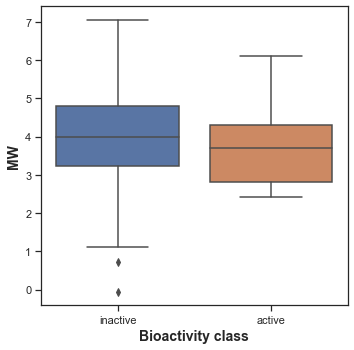

In [62]:
## LOGP ##
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)
            
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
            
plt.savefig('plot_LogP.pdf')

In [63]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,712.5,0.591609,0.05,Same distribution (fail to reject H0)


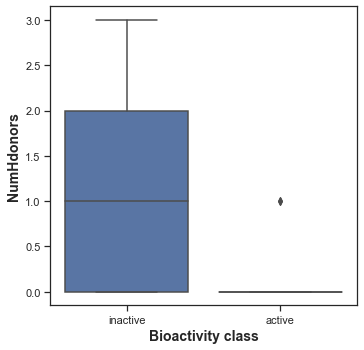

In [64]:
## NUMHDONORS ##
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHdonors', data = df_2class)
            
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHdonors', fontsize=14, fontweight='bold')
            
plt.savefig('plot_NumHDonors.pdf')

In [65]:
mannwhitney('NumHdonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHdonors,299.5,0.000049,0.05,Different distribution (reject H0)


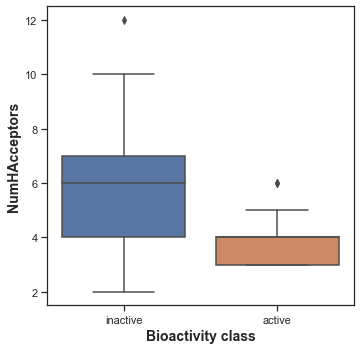

In [66]:
## NUMHACCEPTORS ##
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)
            
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
            
plt.savefig('plot_NumHAcceptors.pdf')

In [67]:
! zip -r results.zip . -i *.csv * .pdf

updating: ShowcaseDataFall21fin.csv (deflated 67%)
updating: Carmax Data Analytics.ipynb (deflated 70%)
updating: bioactivity_data.csv (deflated 90%)
updating: Untitled.ipynb (deflated 78%)
updating: mannwhitneyu_NumHdonors.csv (deflated 9%)
updating: newShowcaseDataFall21.csv (stored 0%)
updating: heart.csv (deflated 77%)
updating: Bioinformatic for drug discovery .ipynb (deflated 68%)
updating: HD_Scott.ipynb (deflated 79%)
updating: mannwhitneyu_MW.csv (deflated 9%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: plot_LogP.pdf (deflated 38%)
updating: bioactivity_preprocessed_data.csv (deflated 80%)
updating: plot_MW.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: plot_ic50.pdf (deflated 37%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: ShowcaseDataFall21.csv (deflated 69%)
updating: plot_MW_vs_LogP.pdf (deflated 16%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
  adding: descriptor

In [68]:
correlations = df_2class.corr()
print(correlations)

                     MW      LogP  NumHdonors  NumHAcceptors     pIC50
MW             1.000000  0.602828    0.505957       0.679101 -0.377436
LogP           0.602828  1.000000    0.027039       0.218736 -0.259311
NumHdonors     0.505957  0.027039    1.000000       0.648366 -0.488544
NumHAcceptors  0.679101  0.218736    0.648366       1.000000 -0.419205
pIC50         -0.377436 -0.259311   -0.488544      -0.419205  1.000000


In [69]:
df_2class.corr()

,MW,LogP,NumHdonors,NumHAcceptors,pIC50
MW,1.000000,0.602828,0.505957,0.679101,-0.377436
LogP,0.602828,1.000000,0.027039,0.218736,-0.259311
NumHdonors,0.505957,0.027039,1.000000,0.648366,-0.488544
NumHAcceptors,0.679101,0.218736,0.648366,1.000000,-0.419205
pIC50,-0.377436,-0.259311,-0.488544,-0.419205,1.000000


In [70]:
# END OF PART 2 #
## BEGINNING OF PART 3 ##
#We will be calculating the moleculare descriptors and prep the dataset#

In [71]:
! pip install padelpy

In [72]:
import pandas as pd

In [73]:
df4 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [74]:
df4

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
4690,4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,intermediate,511.150,7.07230,2.0,3.0,5.612610
4691,4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,intermediate,511.150,7.07230,2.0,3.0,5.595166
4692,4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,intermediate,555.601,7.18140,2.0,3.0,5.419075
4693,4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,intermediate,521.702,6.32710,2.0,5.0,5.460924


In [75]:
# we are only going to select the conconical smiles column
#and the chembl_id 
selection = ['canonical_smiles','molecule_chembl_id']
df4_selection = df4[selection]
#above we are subsetting the data
df4_selection.to_csv('molecule.smi' , sep = '\t', index = False, header = False)

In [76]:
# Looking at the file using BASH 
! cat molecule.smi | head -5
# it will contain the smiles notation and the name of the molecule

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
cat: stdout: Broken pipe


In [77]:
# Quick recap of the above information #
#These smiles notation represent the chemical information that
#pretain to the chemical structure
# example CCOc1nn: C stands for carbon, O for the oxygen, n for nitrogen etc..

In [78]:
# seeing how many lines of molecules we have just to make sure
#all of the rows are being counted in the molecule.smi
! cat molecule.smi | wc -l

    4695


In [79]:
! bash padel.sh
# needto get this oart figured out to get
#authentic feel for cleanng the molecule/ structure so that there are no impurities

bash: padel.sh: No such file or directory


In [80]:
! ls -l

total 116560
-rw-r--r--  1 josephlenzo  staff    318572 Feb  8 15:02 Bioinformatic for drug discovery .ipynb
-rw-r--r--  1 josephlenzo  staff    180388 Nov  2 12:14 Carmax Data Analytics.ipynb
-rw-r--r--  1 josephlenzo  staff     17025 Dec  1 15:27 HD_Scott.ipynb
-rw-r--r--  1 josephlenzo  staff  15686583 Oct 19 13:17 ShowcaseDataFall21.csv
-rw-r--r--  1 josephlenzo  staff  14577574 Oct 22 14:53 ShowcaseDataFall21fin.csv
drwxr-xr-x  2 josephlenzo  staff        64 Oct 19 13:18 Untitled Folder
-rw-r--r--  1 josephlenzo  staff      4991 Nov 29 11:55 Untitled.ipynb
-rw-r--r--  1 josephlenzo  staff    655414 Feb  1 11:16 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r--  1 josephlenzo  staff   8363459 Feb  1 12:47 acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r--  1 josephlenzo  staff     70334 Feb  8 15:01 bioactivity_data.csv
-rw-r--r--  1 josephlenzo  staff     10578 Feb  8 15:01 bioactivity_preprocessed_data.csv
-rw-r--r--  1 josephlenzo

In [81]:
## Preparing the X and Y Data Matrices ##
df4_X = pd.read_csv('descriptors_output.csv')

In [82]:
df4_X
# The X data matrix Will..
#contain the moleculer descriptors which are the pubchem fingerprints 

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# removing the name because we just want just the features 
df4_X = df4_X.drop(columns = ['Name'])
df4_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# The Y data Matix# 

#convert IC50 to pIC50#
df4_Y = df4['pIC50']
df4_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [85]:
# combine X and Y together then uplod to csv for pt.4 #
dataset4 = pd.concat([df4_X,df4_Y],axis = 1)
dataset4

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


In [86]:
#outputting data set 4 to a csv 

dataset4.to_csv('acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index = False)


# long name desrcibes what is going on 
# name break down 
# acetylcholirnesterase : name of the target protein 
# 06 : sequential order 
#bioactivity_data_3class_pIC50_ : contains bioactivity class with the number of classes 
#pubchem fp : speaks on the finger print type

In [87]:
##End of Part 3 ##
## BEGINNING OF PART 4 ##
#[Buidling a regression model of acetylcholinestrease using random forest algorithem]
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [88]:
df4_upload = pd.read_csv('acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


In [89]:
# Input features# 
X = df4_upload.drop('pIC50', axis = 1)
X
#Dropping the pIC50 varaible in order to create the X varaible matrix 
# the pIC50 will be used as the Y varaible

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
Y = df4_upload.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [91]:
# Examining the data dimension 
X.shape

(4695, 881)

In [92]:
Y.shape

(4695,)

In [93]:
# REMOVE LOW VARIANCE FEATURES #
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1-.8)))
X = selection.fit_transform(X)

In [94]:
X.shape

(4695, 137)

In [95]:
# DATA SPLIT(80/20 split) #
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [96]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [98]:
X_test.shape, Y_test.shape

((939, 137), (939,))

In [99]:
# Building a simple regression model #
import numpy as np
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train,Y_train)
r2 = model.score(X_test,Y_test)
r2

0.519000636766368

In [100]:
Y_pred = model.predict(X_test)

/Users/josephlenzo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

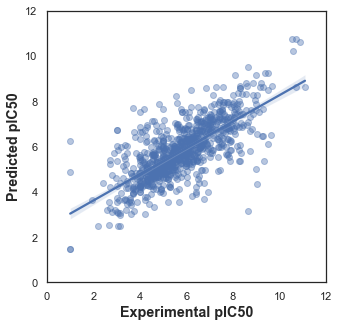

In [101]:
# Scatter Plot of Experimental vs Predicted pIC50 values # 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(color_codes = True)
sns.set_style('white')

ax = sns.regplot(Y_test, Y_pred, scatter_kws = {'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_ylabel('Predicted pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)
plt.show

In [1]:
  #End of Part 4 #
## BEGINNING OF PART 5 ##
#[Will be comparing several ML algorithems for buidling regession
#models of Acetylcholinesterase inhibitors]

In [2]:
! pip install lazypredict

     |████████████████████████████████| 10.2 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 29.2 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 248 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 32.4 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 29.0 MB 7.3 MB/s eta 0:00:011
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp38-cp38-macosx_10_9_x86_64.whl size=44640 sha256=76300a496407851f5ac214fdcfd71bb49a18bd0c06a96dc54791e53b8287b9e7
  Stored in directory: /private/var/folders/pg/1jhff7l50jvfl0kr524r8h480000g

In [4]:
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [6]:
! brew install libomp

Updating Homebrew...
We do not provide support for this pre-release version.
You will encounter build failures with some formulae.
Please create pull requests instead of asking for help on Homebrew's GitHub,
Twitter or any other official channels. You are responsible for resolving
any issues you experience while you are running this
pre-release version.

==> Downloading https://ghcr.io/v2/homebrew/core/gettext/manifests/0.21
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/gettext/blobs/sha256:a025e143fe
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/pcre2/manifests/10.38
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/pcre2/blobs/sha256:c2f04108058a
==> Downloading f

In [7]:
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [14]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=5c7c6648b94e6f83c85d9ff4fc6c4bab194513fe183a8ff9398c44ae4651518c
  Stored in directory: /private/var/folders/pg/1jhff7l50jvfl0kr524r8h480000gn/T/pip-ephem-wheel-cache-7ozqytzk/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [8]:
# Load the data set #
# This is the same data set from earlier #
df4_upload = pd.read_csv('acetylcholirnesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [9]:
X = df4_upload.drop('pIC50', axis = 1)
Y = df4_upload.pIC50

In [10]:
# Examine X dimension
X.shape

(4695, 881)

In [22]:
# Remove low varaincre features 
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 *(1-.8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [23]:
#Perform data splitting using 80/20 ratio 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2)

In [24]:
## COMPARE ML ALGORITHEMS ##

#Defines and builds the lazyclassifier 
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

# the clt.fit means it is now going to learn from the data 

100%|███████████████████████████████████████████| 42/42 [00:29<00:00,  1.42it/s]


In [25]:
# performance table of the training set(80 % subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.46,0.54,1.04,0.16
HistGradientBoostingRegressor,0.46,0.54,1.04,1.89
RandomForestRegressor,0.45,0.53,1.05,2.88
XGBRegressor,0.44,0.52,1.07,0.42
BaggingRegressor,0.42,0.50,1.08,0.37
SVR,0.41,0.49,1.10,2.37
KNeighborsRegressor,0.39,0.48,1.11,0.56
NuSVR,0.39,0.48,1.11,2.05
MLPRegressor,0.38,0.47,1.12,3.13


In [26]:
# performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.46,0.54,1.04,0.16
HistGradientBoostingRegressor,0.46,0.54,1.04,1.89
RandomForestRegressor,0.45,0.53,1.05,2.88
XGBRegressor,0.44,0.52,1.07,0.42
BaggingRegressor,0.42,0.50,1.08,0.37
SVR,0.41,0.49,1.10,2.37
KNeighborsRegressor,0.39,0.48,1.11,0.56
NuSVR,0.39,0.48,1.11,2.05
MLPRegressor,0.38,0.47,1.12,3.13


[(0.0, 1.0)]

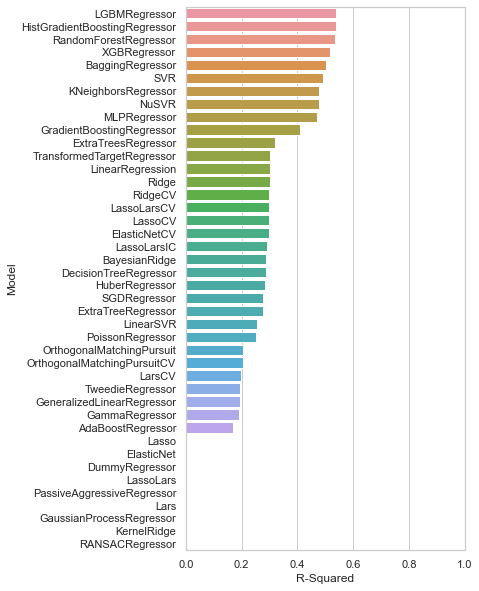

In [28]:
## DATA VISUALIZATION OF MODEL PERFORMACE ##

# bar plot of R-squared values 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize =( 5,10))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(y= train.index, x = 'R-Squared', data = train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

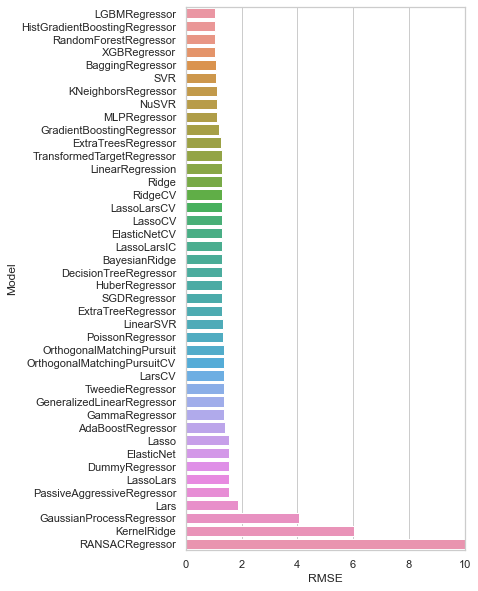

In [30]:
# bar plot of RMSE values 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize =(5,10))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(y= train.index, x = 'RMSE', data = train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

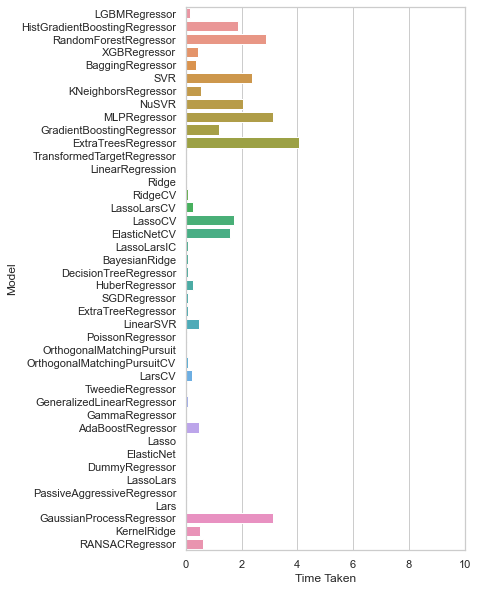

In [31]:
# Barplot of calculation time 

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize =(5,10))
sns.set_theme(style = 'whitegrid')
ax = sns.barplot(y= train.index, x = 'Time Taken', data = train)
ax.set(xlim=(0, 10))

In [ ]:
#Several machine learning models have now been built for comparison 
# End of part 5#
## BEGINNING OF PART 6 ##